In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('ecg_autoencoder_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [4]:
df.shape

(4998, 141)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(140), int64(1)
memory usage: 5.4 MB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [8]:
df=sc.fit_transform(df)
df

array([[ 0.13015314, -0.81456844, -0.92422829, ...,  0.77172417,
         0.63616554,  0.84393733],
       [-0.72754575, -1.62378238, -1.29351275, ...,  0.87786548,
        -0.51593741,  0.84393733],
       [-0.26432105, -0.65284576, -0.99660187, ...,  0.76022193,
         0.2013596 ,  0.84393733],
       ...,
       [-0.74671683, -0.4172529 , -0.27050469, ..., -0.83057384,
        -0.77902953, -1.18492211],
       [-0.24750005, -0.16584826, -0.25041586, ...,  0.89470289,
         1.06875185, -1.18492211],
       [-0.9452788 , -0.38686749, -0.01991038, ..., -0.59541889,
         0.01558609, -1.18492211]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
import tensorflow as tf

In [11]:
x_train,x_test=train_test_split(df,test_size=0.2)

In [12]:
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential

In [13]:
encoder=Sequential([
  Input(shape=(x_train.shape[1],)),
  Dense(32,activation='relu'),
  Dense(16,activation='relu'),
  Dense(8,activation='relu')
])
decoder=Sequential([
    Input(shape=(8,)),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(x_train.shape[1],activation='linear')
])
model=Sequential([
    encoder,
    decoder
])

In [14]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 8)                   │           5,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 141)                 │           5,341 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,549 (41.21 KB)

 Trainable params: 10,549 (41.21 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(optimizer='adam',loss=['mse'])

In [23]:
model.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=10)
h = model.fit(x_train, x_train, epochs = 10, batch_size=512, validation_data=(x_test, x_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1758 - val_loss: 0.1857
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1756 - val_loss: 0.1806
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1599 - val_loss: 0.1748
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1600 - val_loss: 0.1727
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1564 - val_loss: 0.1696
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1557 - val_loss: 0.1668
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1607 - val_loss: 0.1612
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1392 - val_loss: 0.1573
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1445 - val_loss: 0.1549
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1479 - val_loss: 0.1529
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1429 - val_loss: 0.1503
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - los

In [24]:
pred=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


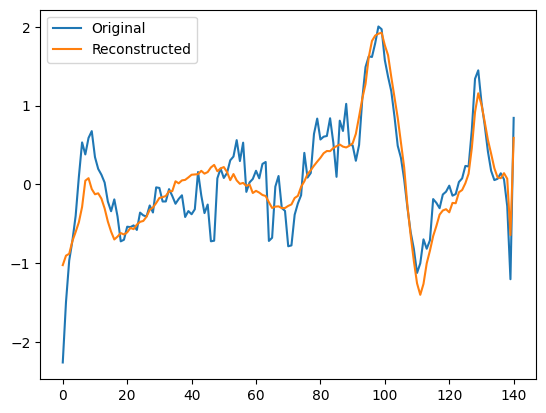

In [25]:
plt.figure()
plt.plot(x_test[0],label='Original')
plt.plot(pred[0],label='Reconstructed')
plt.legend()
plt.show()

In [26]:
mse=np.mean(np.power(pred-x_test,2),axis=1)
thresh=np.percentile(mse,95)

In [27]:
print(thresh)

0.36276167064817727


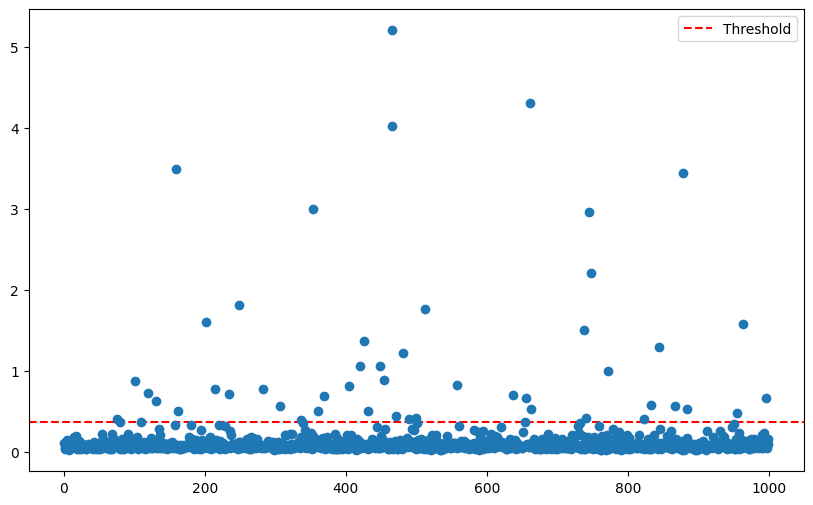

In [28]:
plt.figure(figsize=(10,6))
plt.axhline(thresh,linestyle='--',color='r',label='Threshold')
plt.plot(mse,linestyle='',marker='o')
plt.legend()
plt.show()

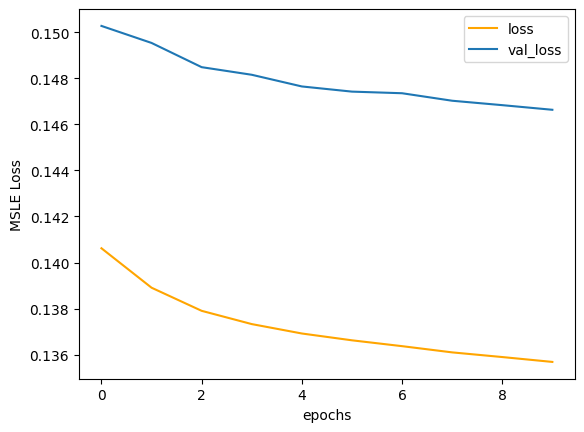

In [29]:

plt.plot(h.history['loss'],label='loss',color='orange')
plt.plot(h.history['val_loss'],label='val_loss')
plt.ylabel('MSLE Loss')
plt.xlabel('epochs')
plt.legend()